<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/Netflix_Recommendation_Capstron_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Allocating column names to data frame
df = pd.read_csv(r'movie_titles.csv',
                 header=None,
                 names=['movie_id', 'year', 'title'],
                 encoding='latin1',
                on_bad_lines='skip')

In [6]:
df.head()

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [7]:
# Year Convertion from float to int
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')

In [8]:
df.head()

,movie_id,year,title
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [9]:
df_new = pd.read_csv(r'combined_data_1.txt')

In [10]:
# combined data contains movie_id, user_id, rating, date
df_new.head()

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03


In [11]:

file_path = r'combined_data_1.txt'

movie_id = 0
data = {'movie_id': [], 'user_id': [], 'rating': [], 'date': []}

with open(file_path, 'r', encoding='latin1') as f:
    for line in f:
        line = line.strip()
        if line.endswith(':'):
            movie_id = int(line[:-1])
        else:
            try:
                user_id, rating, date = line.split(',')
                data['movie_id'].append(movie_id)
                data['user_id'].append(int(user_id))
                data['rating'].append(int(rating))
                data['date'].append(date)
            except ValueError:
                continue

ratings = pd.DataFrame(data)



In [12]:
print(ratings.head())

   movie_id  user_id  rating        date
0         1  1488844       3  2005-09-06
1         1   822109       5  2005-05-13
2         1   885013       4  2005-10-19
3         1    30878       4  2005-12-26
4         1   823519       3  2004-05-03


In [13]:
# merging movie titles and combined data datasets

df = ratings.merge(df, on='movie_id', how='left')

In [14]:
df

,movie_id,user_id,rating,date,year,title
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet
1,1,822109,5,2005-05-13,2003,Dinosaur Planet
2,1,885013,4,2005-10-19,2003,Dinosaur Planet
3,1,30878,4,2005-12-26,2003,Dinosaur Planet
4,1,823519,3,2004-05-03,2003,Dinosaur Planet
...,...,...,...,...,...,...
23233468,4356,2368042,2,2005-09-21,2002,Road to Perdition
23233469,4356,1353,4,2005-09-21,2002,Road to Perdition
23233470,4356,390643,3,2005-09-21,2002,Road to Perdition
23233471,4356,1755421,5,2005-09-21,2002,Road to Perdition


In [15]:
# popular movies by count of ratings

top_movies = (
    df.groupby('title')['rating']
    .count()
    .sort_values(ascending=False)
    .head(15)
    .index.tolist()
)

print(top_movies)

['Pirates of the Caribbean: The Curse of the Black Pearl', 'What Women Want', 'Bruce Almighty', 'American Beauty', 'Shrek 2', 'The Sixth Sense', 'Lord of the Rings: The Fellowship of the Ring', '50 First Dates', 'Finding Nemo (Widescreen)', 'The Wedding Planner', 'The Last Samurai', 'The Bourne Supremacy', 'Men in Black II', 'Braveheart', 'Ghost']


In [16]:

# Manual genre mapping for known titles
genre_map = {
    'Dinosaur Planet': 'Documentary',
    'Isle of Man TT 2004 Review': 'Sports',
    'Character': 'Drama',
    "Paula Abdul's Get Up & Dance": 'Music',
    'The Rise and Fall of ECW': 'Sports'
}

# Keyword based fallback extraction function
genre_keywords = {
    'Love': 'Romance',
    'War': 'War',
    'Dance': 'Music',
    'Planet': 'Documentary',
    'Football': 'Sports',
    'Horror': 'Horror',
    'Adventure': 'Action',
    'Comedy': 'Comedy',
    'Life': 'Drama',
    'Crime': 'Thriller',
    'World': 'Documentary',
    'Space': 'Sci-Fi',
    'Battle': 'Action',
    'Police': 'Crime',
    'Ghost': 'Horror',
    'Heart': 'Romance',
}

def extract_genre(title):
    """Heuristic extraction of genre from movie title."""
    for word, genre in genre_keywords.items():
        if word.lower() in str(title).lower():
            return genre
    return 'Unknown'

# manual mapping
df['genre'] = df['title'].map(genre_map)

# keyword extraction for remaining movies
df['genre'] = np.where(df['genre'].isna(), df['title'].apply(extract_genre), df['genre'])

df[['title', 'genre']].head(85)


,title,genre
0,Dinosaur Planet,Documentary
1,Dinosaur Planet,Documentary
2,Dinosaur Planet,Documentary
3,Dinosaur Planet,Documentary
4,Dinosaur Planet,Documentary
...,...,...
80,Dinosaur Planet,Documentary
81,Dinosaur Planet,Documentary
82,Dinosaur Planet,Documentary
83,Dinosaur Planet,Documentary


In [17]:
df['genre'].unique()

array(['Documentary', 'Sports', 'Drama', 'Music', 'Unknown', 'Romance',
       'Horror', 'War', 'Sci-Fi', 'Action', 'Crime', 'Thriller', 'Comedy'],
      dtype=object)

In [18]:
df.head()

,movie_id,user_id,rating,date,year,title,genre
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet,Documentary
1,1,822109,5,2005-05-13,2003,Dinosaur Planet,Documentary
2,1,885013,4,2005-10-19,2003,Dinosaur Planet,Documentary
3,1,30878,4,2005-12-26,2003,Dinosaur Planet,Documentary
4,1,823519,3,2004-05-03,2003,Dinosaur Planet,Documentary


# 1. Find out the list of most popular and liked genre

In [58]:
# # Calculate genre stats

filtered_genre_stats = genre_stats[genre_stats['genre'] != 'Unknown']

most_popular_genre = filtered_genre_stats.sort_values('num_ratings', ascending=False).head(10)
most_liked_genre   = filtered_genre_stats.sort_values('avg_rating', ascending=False).head(10)



In [51]:
print(most_popular_genre)

          genre  num_ratings  avg_rating
7       Romance       355695    3.727623
5        Horror       333026    3.553185
3   Documentary       215272    3.339975
12          War       214062    3.687843
4         Drama       202804    3.520503
0        Action        57753    3.688518
8        Sci-Fi        38307    3.446602
2         Crime        28341    3.474930
6         Music        12090    3.454921
1        Comedy         9477    3.190567


In [52]:
print(most_liked_genre)

          genre  num_ratings  avg_rating
9        Sports         1285    3.878599
7       Romance       355695    3.727623
0        Action        57753    3.688518
12          War       214062    3.687843
5        Horror       333026    3.553185
4         Drama       202804    3.520503
2         Crime        28341    3.474930
6         Music        12090    3.454921
8        Sci-Fi        38307    3.446602
3   Documentary       215272    3.339975


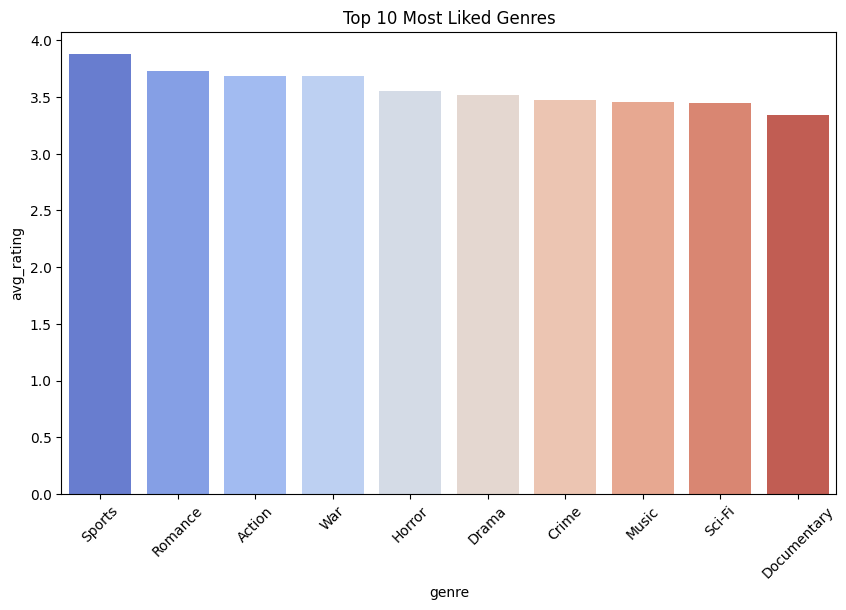

In [56]:

plt.figure(figsize=(10,6))
sns.barplot(data=most_liked_genre, x='genre', y='avg_rating', hue='genre', dodge=False, legend=False, palette='coolwarm')
plt.title('Top 10 Most Liked Genres')
plt.xticks(rotation=45)
plt.show()

In [28]:
df.head()

,movie_id,user_id,rating,date,year,title,genre
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet,Documentary
1,1,822109,5,2005-05-13,2003,Dinosaur Planet,Documentary
2,1,885013,4,2005-10-19,2003,Dinosaur Planet,Documentary
3,1,30878,4,2005-12-26,2003,Dinosaur Planet,Documentary
4,1,823519,3,2004-05-03,2003,Dinosaur Planet,Documentary


# 2. Create Model that finds the best suited Movie for one user in every genre

In [30]:

def best_movies_per_genre_for_user(df, user_id, top_n=1):

    df = df.dropna(subset=['rating'])

    # Movies user has already rated
    watched = df[df['user_id'] == user_id]['title'].unique()

    # Average rating per movie within each genre
    genre_movie_ratings = (
        df.groupby(['genre', 'title'])['rating']
        .mean()
        .reset_index()
    )

    # Remove movies already watched by user
    genre_movie_ratings = genre_movie_ratings[~genre_movie_ratings['title'].isin(watched)]

    # For each genre, top N movies
    best_per_genre = (
        genre_movie_ratings
        .sort_values(['genre', 'rating'], ascending=[True, False])
        .groupby('genre')
        .head(top_n)
        .reset_index(drop=True)
    )

    return best_per_genre

# first user in dataset
user_id_example = df['user_id'].iloc[0]
best_for_user = best_movies_per_genre_for_user(df, user_id_example, top_n=1)

print(f"Best suited movies for User {user_id_example} in every genre:")

print(best_for_user)


Best suited movies for User 1488844 in every genre:
          genre                                              title    rating
0        Action                              The Battle of Algiers  4.123802
1        Comedy  Latham Entertainment Presents: An All New Come...  3.574843
2         Crime                  The Police: Every Breath You Take  3.636986
3   Documentary                    Dragon Ball Z: World Tournament  3.981117
4         Drama                                  The Life of Birds  4.164071
5        Horror   Ghost in the Shell: Stand Alone Complex: 2nd Gig  4.586364
6         Music             Dora the Explorer: Dance to the Rescue  3.931973
7       Romance                              I Love Lucy: Season 5  4.192128
8        Sci-Fi  VeggieTales Classics: Larry-Boy & The Fib from...  4.189387
9        Sports                           The Rise and Fall of ECW  3.919298
10     Thriller  Burn Up Excess: Vol. 2: Crimes and Missed Deme...  3.654596
11      Unknown         

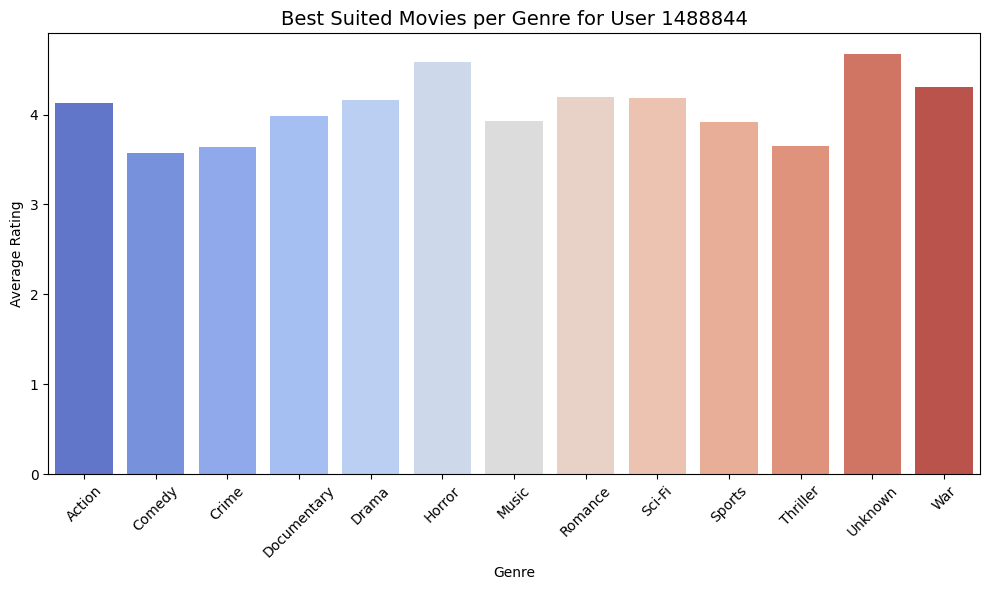

Action:     The Battle of Algiers    (Avg Rating: 4.12)
Comedy:     Latham Entertainment Presents: An All New Comedy Experience    (Avg Rating: 3.57)
Crime:     The Police: Every Breath You Take    (Avg Rating: 3.64)
Documentary:     Dragon Ball Z: World Tournament    (Avg Rating: 3.98)
Drama:     The Life of Birds    (Avg Rating: 4.16)
Horror:     Ghost in the Shell: Stand Alone Complex: 2nd Gig    (Avg Rating: 4.59)
Music:     Dora the Explorer: Dance to the Rescue    (Avg Rating: 3.93)
Romance:     I Love Lucy: Season 5    (Avg Rating: 4.19)
Sci-Fi:     VeggieTales Classics: Larry-Boy & The Fib from Outer Space    (Avg Rating: 4.19)
Sports:     The Rise and Fall of ECW    (Avg Rating: 3.92)
Thriller:     Burn Up Excess: Vol. 2: Crimes and Missed Demeanors    (Avg Rating: 3.65)
Unknown:     Lost: Season 1    (Avg Rating: 4.67)
War:     The Simpsons: Bart Wars    (Avg Rating: 4.31)


In [49]:

plt.figure(figsize=(10,6))
sns.barplot(
    data=best_for_user,
    x='genre',
    y='rating',
    hue='genre',
    dodge=False,
    palette='coolwarm',
    legend=False
)
plt.title(f'Best Suited Movies per Genre for User {user_id_example}', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Annotated Text Output for Reference ---
for _, row in best_for_user.iterrows():
    print(f"{row['genre']}:     {row['title']}    (Avg Rating: {row['rating']:.2f})")


 # 3. Find what Genre Movies have received the best and worst ratings based on User Rating

In [31]:

#  Statistics per genre
genre_summary = (
    df.groupby('genre')['rating']
      .agg(['mean', 'count'])
      .reset_index()
      .rename(columns={'mean': 'avg_rating', 'count': 'num_ratings'})
)


best_genres = genre_summary.sort_values('avg_rating', ascending=False).head(5)
worst_genres = genre_summary.sort_values('avg_rating', ascending=True).head(5)

print("Best Genres with Highest Average Ratings:")
print(best_genres)

print("Worst Genres with Lowest Average Ratings:")
print(worst_genres)


Best Genres with Highest Average Ratings:
      genre  avg_rating  num_ratings
9    Sports    3.878599         1285
7   Romance    3.727623       355695
0    Action    3.688518        57753
12      War    3.687843       214062
11  Unknown    3.602082     21762933
Worst Genres with Lowest Average Ratings:
          genre  avg_rating  num_ratings
10     Thriller    3.032949         2428
1        Comedy    3.190567         9477
3   Documentary    3.339975       215272
8        Sci-Fi    3.446602        38307
6         Music    3.454921        12090


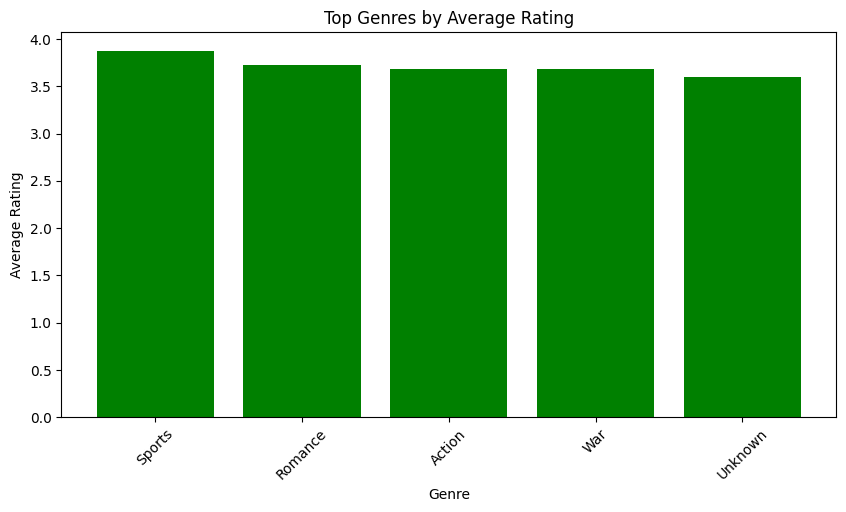

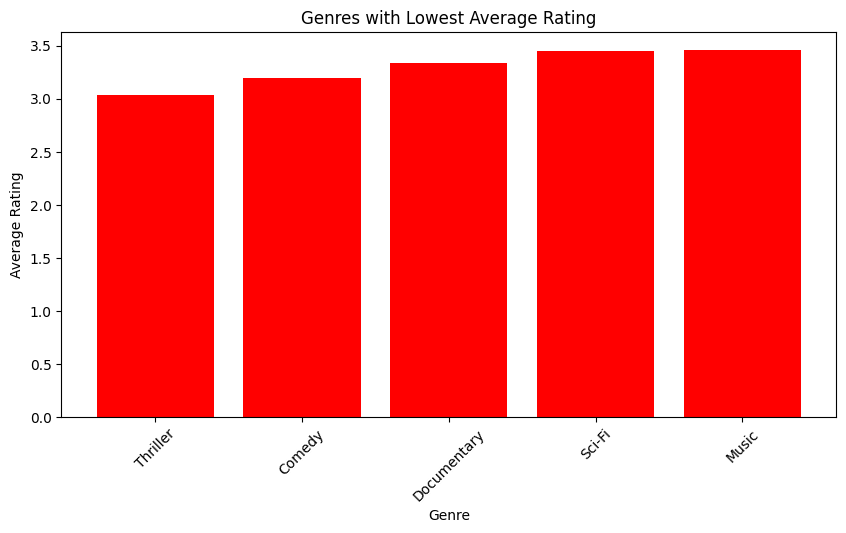

In [33]:

plt.figure(figsize=(10,5))
plt.bar(best_genres['genre'], best_genres['avg_rating'], color='green')
plt.title('Top Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(worst_genres['genre'], worst_genres['avg_rating'], color='red')
plt.title('Genres with Lowest Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()
